# SF 2357 project part III : Convolutional Neural Network Classification

Let's first import all the needed packages and functions :  

- [numpy] is the fundamental package for scientific computing with Python.
- [pandas] library providing high-performance data structures and data analysis.
- [matplotlib] is a library to plot graphs in Python.
- [seaborn] data visualization library based on matplotlib.
- [sklearn] fundamental Machine Learning library in Python.  


For Deep learning :
- [keras] Keras is a high-level neural networks API, written in Python, we will use it with the Tensorflow backend.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Input, Dense, Conv2D, MaxPool2D
from keras.layers import Flatten, Activation, BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras import backend as K
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


## 1 - Description of the data & motivation

Data set + goals

In [2]:
data, labels = datasets.load_digits(return_X_y=True)

In [3]:
#Convert the data to pandas dataframe for convenience (visualization)
data = pd.DataFrame(data)
labels = pd.DataFrame(labels)

In [4]:
data.shape

(1797, 64)

In [5]:
labels.shape

(1797, 1)

In [6]:
# Check if there are any missing values
data.isna().values.any()

False

Let's visualize some data samples:

In [7]:
def plot_samples(data, labels):
    """
    This function plots 9 randomly selected data samples.
    
    Arguments:
    data -- Pandas DataFram with the images
    labels -- The corresponding labels
    
    Returns:
    None
    """
    indices = np.random.randint(0, data.shape[0], size=9)
    for i,j in zip(indices, range(9)):
        plt.subplot(3,3,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.array(data)[i,:].reshape(8,8))
        plt.xlabel(np.array(labels)[i])

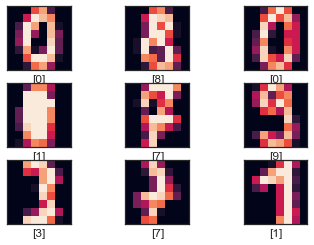

In [8]:
plot_samples(data, labels)

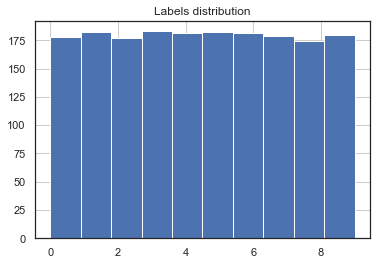

In [9]:
# Visualize label distribution
labels.hist()
plt.title("Labels distribution")
plt.show()

We can see that the labels are uniformly distributed.

## 2 - Data preprocessing

Now let's split the data into a train and validation set.

In [10]:
X_train_origin, X_val_origin, y_train_origin, y_val_origin = train_test_split(data, labels, test_size=0.20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1393a5990>]],
      dtype=object)

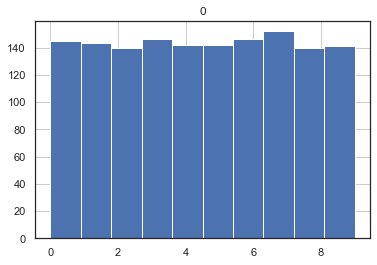

In [11]:
y_train_origin.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13b983dd0>]],
      dtype=object)

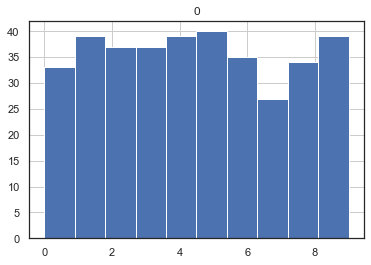

In [12]:
y_val_origin.hist()

Our train and validation set are well balanced.

In [13]:
#We reshape and normalize the data
X_train = np.array(X_train_origin).reshape(X_train_origin.shape[0], 8, 8)
X_val = np.array(X_val_origin).reshape(X_val_origin.shape[0], 8, 8)

X_train /= 255
X_val /= 255

#Add new axis to be able to feed it to the CNN
X_train = X_train[:,:,:,np.newaxis]
X_val = X_val[:,:,:,np.newaxis]

In [14]:
X_train.shape

(1437, 8, 8, 1)

In [15]:
#One-hot encoding of the labels
y_train = to_categorical(y_train_origin)
y_val = to_categorical(y_val_origin)

## 3 - Building our model

CNNs are meant to extract hierarchical features in the data.
The building blocks of a CNN are blocks of 'convolutional layer + pooling layer' one after the other.  

Usually the first layers are meant to extract low-level features as edges.  
The mid layers are meant to extract mid-level features as shapes.  
The last layers are meant to extract high-level features as objects.


In [16]:
#build model
def build_model():
    """
    """
    input_layer = Input(shape=(8,8,1))
    #First block
    conv_1 = Conv2D(32, 3,strides=(1, 1), padding='same',activation = 'relu')(input_layer)
    batch_norm_1 = BatchNormalization(axis = 3)(conv_1)
    max_pool_1 = MaxPool2D(pool_size= (2,2))(batch_norm_1)
    dropout_1 = Dropout(0.25)(max_pool_1)
    
    #Second block
    #conv_2 = Conv2D(32, 3,strides=(1, 1), padding='same',activation = 'relu')(dropout_1)
    #batch_norm_2 = BatchNormalization(axis = 3)(conv_2)
    #max_pool_2 = MaxPool2D(pool_size= (2,2))(batch_norm_2)
    #dropout_2 = Dropout(0.25)(max_pool_2)
    
    #Third block
    #conv_3 = Conv2D(32, 3,strides=(1, 1), padding='same',activation = 'relu')(dropout_2)
    #batch_norm_3 = BatchNormalization(axis = 3)(conv_3)
    #max_pool_3 = MaxPool2D(pool_size= (2,2))(batch_norm_3)
    #dropout_3 = Dropout(0.25)(max_pool_3)
    
    #Output block
    flatten_layer = Flatten()(dropout_1)
    output_layer = Dense(10,activation='softmax')(flatten_layer)
    
    model = Model(input_layer,output_layer)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [17]:
model = build_model()

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8, 8, 1)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 32)          128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130

In [19]:
history = model.fit(x = X_train, y = y_train, batch_size= 32, epochs=50, validation_data=(X_val,y_val))

Train on 1437 samples, validate on 360 samples
Epoch 1/50
1437/1437 [==============================] - 1s 767us/step - loss: 2.0079 - accuracy: 0.4955 - val_loss: 2.2734 - val_accuracy: 0.5361
Epoch 2/50
1437/1437 [==============================] - 0s 213us/step - loss: 1.2008 - accuracy: 0.8392 - val_loss: 2.1907 - val_accuracy: 0.7889
Epoch 3/50
1437/1437 [==============================] - 0s 308us/step - loss: 0.5984 - accuracy: 0.8942 - val_loss: 2.0737 - val_accuracy: 0.8611
Epoch 4/50
1437/1437 [==============================] - 0s 252us/step - loss: 0.3803 - accuracy: 0.9172 - val_loss: 1.9426 - val_accuracy: 0.9222
Epoch 5/50
1437/1437 [==============================] - 0s 221us/step - loss: 0.2861 - accuracy: 0.9311 - val_loss: 1.7993 - val_accuracy: 0.9222
Epoch 6/50
1437/1437 [==============================] - 0s 195us/step - loss: 0.2350 - accuracy: 0.9408 - val_loss: 1.6168 - val_accuracy: 0.9472
Epoch 7/50
1437/1437 [==============================] - 0s 199us/step - loss:

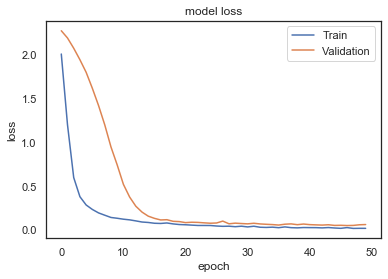

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

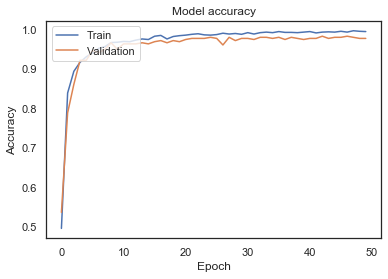

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
results_val = model.evaluate(X_val, y_val, batch_size=32)
print('val loss, val acc:', results_val)

360/360 [==============================] - 0s 204us/step
val loss, val acc: [0.06280733714811504, 0.9777777791023254]


In [23]:
results_train = model.evaluate(X_train, y_train, batch_size=32)
print('train loss, train acc:', results_train)

1437/1437 [==============================] - 0s 101us/step
train loss, train acc: [0.008120447038993676, 0.9993041157722473]


The goal was to use the smallest number of parameters without sacrificing performance